In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn

In [2]:
data = pd.read_csv('M1_final (assignment 2).csv')
print(data.shape)
data

(28820, 23)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [3]:
data['Condition'].unique()

array(['Fair / Windy', 'Fair', 'Light Rain / Windy', 'Partly Cloudy',
       'Mostly Cloudy', 'Cloudy', 'Light Rain', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Light Snow / Windy', 'Cloudy / Windy',
       'Light Drizzle', 'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix',
       'Light Freezing Rain', 'Light Snow', 'Wintry Mix / Windy',
       'Fog / Windy', 'Light Drizzle / Windy', 'Rain / Windy',
       'Drizzle and Fog', 'Snow', 'Heavy Rain / Windy'], dtype=object)

In [4]:
data['DEST'].unique()

array(['CHS', 'LAX', 'FLL', 'MCO', 'ATL', 'ORD', 'BUF', 'LGB', 'LAS',
       'DCA', 'PHX', 'SFO', 'SJU', 'SLC', 'BOS', 'SAV', 'SYR', 'MSP',
       'SEA', 'MIA', 'PDX', 'TPA', 'BTV', 'IAH', 'DEN', 'RSW', 'ORF',
       'JAX', 'MSY', 'CLT', 'BNA', 'RDU', 'SAN', 'SJC', 'ROC', 'DFW',
       'IAD', 'AUS', 'DTW', 'PWM', 'SRQ', 'CMH', 'HNL', 'PBI', 'BWI',
       'CLE', 'BUR', 'PIT', 'RIC', 'IND', 'CVG', 'SMF', 'ONT', 'SAT',
       'PSP', 'OAK', 'ABQ', 'PSE', 'ORH', 'BQN', 'STT', 'RNO', 'PHL',
       'EGE', 'JAC'], dtype=object)

In [5]:
data['TAIL_NUM'].unique().size

2092

In [6]:
data = data.drop(['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','TAIL_NUM'],axis=1)
data

,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,ORH,2,57,150,1370,1372,1427,39,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,BOS,2,75,187,1390,1392,25,39,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,SEA,283,392,2422,1125,1408,1337,39,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,SJU,5,224,1598,1417,1422,261,39,38,96,N,6,0,30.18,Cloudy,19,23,13


In [7]:
DATA = data.copy(deep=True)
DATA

,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,ORH,2,57,150,1370,1372,1427,39,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,BOS,2,75,187,1390,1392,25,39,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,SEA,283,392,2422,1125,1408,1337,39,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,SJU,5,224,1598,1417,1422,261,39,38,96,N,6,0,30.18,Cloudy,19,23,13


In [8]:
#Label Encoding
from sklearn import preprocessing
lable_encoder=preprocessing.LabelEncoder()
data['Condition']= lable_encoder.fit_transform(data['Condition'])
data['Wind'] = lable_encoder.fit_transform(data['Wind'])
data['DEST'] = lable_encoder.fit_transform(data['DEST'])
data

,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,10,-1,124,636,324,323,448,48,34,58,15,25,38,29.86,4,9,17,14
1,28,-7,371,2475,340,333,531,48,34,58,15,25,38,29.86,4,9,17,15
2,20,40,181,1069,301,341,482,48,34,58,15,25,38,29.86,4,9,17,22
3,30,-2,168,944,345,343,513,48,34,58,15,25,38,29.86,4,9,17,12
4,1,-4,139,760,360,356,499,46,32,58,15,24,35,29.91,4,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,38,2,57,150,1370,1372,1427,39,38,96,4,6,0,30.18,0,20,32,19
28816,4,2,75,187,1390,1392,25,39,38,96,4,6,0,30.18,0,19,23,22
28817,55,283,392,2422,1125,1408,1337,39,38,96,4,6,0,30.18,0,19,23,21
28818,58,5,224,1598,1417,1422,261,39,38,96,4,6,0,30.18,0,19,23,13


In [9]:
X = data.iloc[:, :-1] #input variables
Y = data.iloc[:,-1] #output variables
print(X.head(5),Y.head(5))

   DEST  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  DEP_TIME_M  \
0    10         -1               124       636        324         323   
1    28         -7               371      2475        340         333   
2    20         40               181      1069        301         341   
3    30         -2               168       944        345         343   
4     1         -4               139       760        360         356   

   CRS_ARR_M  Temperature Dew Point  Humidity  Wind  Wind Speed  Wind Gust  \
0        448           48        34        58    15          25         38   
1        531           48        34        58    15          25         38   
2        482           48        34        58    15          25         38   
3        513           48        34        58    15          25         38   
4        499           46        32        58    15          24         35   

   Pressure  Condition  sch_dep  sch_arr  
0     29.86          4        9       17  
1     

In [10]:
#Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [11]:
#Scaling
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [12]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
# Predicted value and RMSE
y_pred = linear_regressor.predict(x_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_linear = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, linear_regressor.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_linear)

RMSE for training data: 6.546247117333105
RMSE for test data: 6.602724426428675


In [14]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1, normalize=True)
ridgeReg.fit(x_train, y_train)
y_pred = ridgeReg.predict(x_test)
rmse_ridge = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, ridgeReg.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_ridge)

RMSE for training data: 6.562991133621684
RMSE for test data: 6.621784688474897


In [15]:
#Lasso Regression
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.1, normalize=True)
lassoReg.fit(x_train, y_train)
y_pred = lassoReg.predict(x_test)
rmse_lasso = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, lassoReg.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_lasso)

RMSE for training data: 6.84599891245749
RMSE for test data: 6.903781767104768


In [16]:
#K Near Neighbours
from sklearn import neighbors
rmse_KNN = []  #We will check for multiple values of k
for K in range(30):
    KNN = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    error = sqrt( mean_squared_error(y_test, y_pred) )
    rmse_KNN.append(error)
    print('RMSE for K = ', K+1, ' is:', error)
# Note: it is taking some time to execute so wait till it is completely executed

RMSE for K =  1  is: 8.133983849785018
RMSE for K =  2  is: 7.157959275200355
RMSE for K =  3  is: 6.745900306564147
RMSE for K =  4  is: 6.5813616867355655
RMSE for K =  5  is: 6.519943248093671
RMSE for K =  6  is: 6.450493420760147
RMSE for K =  7  is: 6.437657568780652
RMSE for K =  8  is: 6.409020543488401
RMSE for K =  9  is: 6.396640307407532
RMSE for K =  10  is: 6.371715180174471
RMSE for K =  11  is: 6.3572171269843984
RMSE for K =  12  is: 6.36406269225563
RMSE for K =  13  is: 6.36037183460769
RMSE for K =  14  is: 6.347811792641759
RMSE for K =  15  is: 6.345378564830053
RMSE for K =  16  is: 6.343543656031579
RMSE for K =  17  is: 6.3442561726278806
RMSE for K =  18  is: 6.342319978029512
RMSE for K =  19  is: 6.340199762574384
RMSE for K =  20  is: 6.3463892754487485
RMSE for K =  21  is: 6.362047992713278
RMSE for K =  22  is: 6.363591357303649
RMSE for K =  23  is: 6.36649568363181
RMSE for K =  24  is: 6.368379775393744
RMSE for K =  25  is: 6.3655638441095785
RMSE fo

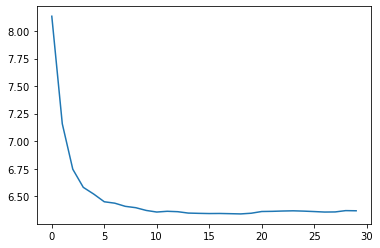

In [17]:
#plotting rmse values against number of neighbours
plt.plot(rmse_KNN)

In [18]:
#Standard Vector Regression
from sklearn.svm import SVR
SVRreg = SVR(kernel = 'rbf')
SVRreg.fit(x_train, y_train)
y_pred = SVRreg.predict(x_test)
rmse_SVR = sqrt( mean_squared_error(y_test, y_pred) )
print('RMSE for test data:', rmse_SVR)
# Note: it is taking some time to execute so wait till it is completely executed

RMSE for test data: 6.468420816686364


In [19]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
rmse_NB = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, gnb.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_NB)

RMSE for training data: 8.709147829607568
RMSE for test data: 8.752455787032321


In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
rmse_RF = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, RF.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_RF)
# Note: it is taking some time to execute so wait till it is completely executed

RMSE for training data: 2.140790165200943
RMSE for test data: 5.817829409272163


In [21]:
#LightGBM
import lightgbm as ltb
Lgbm = ltb.LGBMRegressor()
Lgbm.fit(x_train, y_train)
y_pred = Lgbm.predict(x_test)
rmse_Lgbm = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, Lgbm.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_Lgbm)

RMSE for training data: 5.456010204165137
RMSE for test data: 5.839683821647585


In [22]:
#One Hot Encoding
DATA = DATA.drop(['TAXI_OUT'], axis=1) #We can use the output variable we have already taken
DATA.head()

,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
0,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17
1,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17
2,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17
3,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17
4,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17


In [23]:
DATA = pd.get_dummies(DATA, columns = ['Condition', 'Wind', 'DEST'])
DATA.head()

,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,...,DEST_SEA,DEST_SFO,DEST_SJC,DEST_SJU,DEST_SLC,DEST_SMF,DEST_SRQ,DEST_STT,DEST_SYR,DEST_TPA
0,-1,124,636,324,323,448,48,34,58,25,...,0,0,0,0,0,0,0,0,0,0
1,-7,371,2475,340,333,531,48,34,58,25,...,0,0,0,0,0,0,0,0,0,0
2,40,181,1069,301,341,482,48,34,58,25,...,0,0,0,0,0,0,0,0,0,0
3,-2,168,944,345,343,513,48,34,58,25,...,0,0,0,0,0,0,0,0,0,0
4,-4,139,760,360,356,499,46,32,58,24,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X = DATA #input variables
#output variables are same as before
print(X.head(5),Y.head(5))

   DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  DEP_TIME_M  CRS_ARR_M  \
0         -1               124       636        324         323        448   
1         -7               371      2475        340         333        531   
2         40               181      1069        301         341        482   
3         -2               168       944        345         343        513   
4         -4               139       760        360         356        499   

   Temperature Dew Point  Humidity  Wind Speed  ...  DEST_SEA  DEST_SFO  \
0           48        34        58          25  ...         0         0   
1           48        34        58          25  ...         0         0   
2           48        34        58          25  ...         0         0   
3           48        34        58          25  ...         0         0   
4           46        32        58          24  ...         0         0   

   DEST_SJC  DEST_SJU  DEST_SLC  DEST_SMF  DEST_SRQ  DEST_STT  DEST_SYR  \
0    

In [25]:
#Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [26]:
#Scaling
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [27]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [28]:
# Predicted value and RMSE
y_pred = linear_regressor.predict(x_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_linear = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, linear_regressor.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_linear)

RMSE for training data: 6.37799333683533
RMSE for test data: 6.42591205224985


In [29]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.1, normalize=True)
ridgeReg.fit(x_train, y_train)
y_pred = ridgeReg.predict(x_test)
rmse_ridge = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, ridgeReg.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_ridge)

RMSE for training data: 6.402512385153983
RMSE for test data: 6.474502562363902


In [30]:
#Lasso Regression
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.1, normalize=True)
lassoReg.fit(x_train, y_train)
y_pred = lassoReg.predict(x_test)
rmse_lasso = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, lassoReg.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_lasso)

RMSE for training data: 6.84599891245749
RMSE for test data: 6.903781767104768


In [31]:
#K Near Neighbours
from sklearn import neighbors
rmse_KNN = []  #We will check for multiple values of k
for K in range(30):
    KNN = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    KNN.fit(x_train, y_train)
    y_pred = KNN.predict(x_test)
    error = sqrt( mean_squared_error(y_test, y_pred) )
    rmse_KNN.append(error)
    print('RMSE for K = ', K+1, ' is:', error)
# Note: it is taking some time to execute so wait till it is completely executed

RMSE for K =  1  is: 8.736444838989431
RMSE for K =  2  is: 7.689424905557605
RMSE for K =  3  is: 7.37238304539735
RMSE for K =  4  is: 7.109572307108701
RMSE for K =  5  is: 6.949764223480597
RMSE for K =  6  is: 6.895773384459522
RMSE for K =  7  is: 6.841201397969246
RMSE for K =  8  is: 6.829216759829867
RMSE for K =  9  is: 6.816878614785102
RMSE for K =  10  is: 6.786677666895436
RMSE for K =  11  is: 6.756899536991616
RMSE for K =  12  is: 6.75008049774512
RMSE for K =  13  is: 6.742545995814402
RMSE for K =  14  is: 6.716382830511706
RMSE for K =  15  is: 6.714086384008852
RMSE for K =  16  is: 6.703812039758952
RMSE for K =  17  is: 6.706794683303515
RMSE for K =  18  is: 6.70472013726036
RMSE for K =  19  is: 6.700361376110094
RMSE for K =  20  is: 6.694580239279583
RMSE for K =  21  is: 6.687144817243199
RMSE for K =  22  is: 6.697531026136051
RMSE for K =  23  is: 6.692917448146794
RMSE for K =  24  is: 6.692121554587918
RMSE for K =  25  is: 6.694476536662938
RMSE for K =

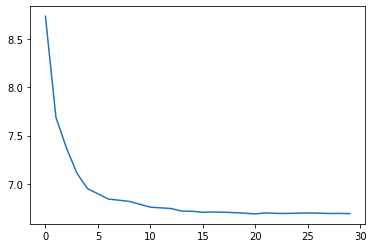

In [32]:
#plotting rmse values against number of neighbours
plt.plot(rmse_KNN)

In [33]:
#Standard Vector Regression
from sklearn.svm import SVR
SVRreg = SVR(kernel = 'rbf')
SVRreg.fit(x_train, y_train)
y_pred = SVRreg.predict(x_test)
rmse_SVR = sqrt( mean_squared_error(y_test, y_pred) )
print('RMSE for test data:', rmse_SVR)
# Note: it is taking some time to execute so wait till it is completely executed

RMSE for test data: 6.52186727508762


In [34]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
rmse_NB = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, gnb.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_NB)

RMSE for training data: 14.85653758705196
RMSE for test data: 14.965203684034828


In [35]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
rmse_RF = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, RF.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_RF)
# Note: it is taking some time to execute so wait till it is completely executed

RMSE for training data: 2.1131798861535036
RMSE for test data: 5.7396776943220535


In [36]:
#LightGBM
import lightgbm as ltb
Lgbm = ltb.LGBMRegressor()
Lgbm.fit(x_train, y_train)
y_pred = Lgbm.predict(x_test)
rmse_Lgbm = sqrt( mean_squared_error(y_test, y_pred) )
rmse_train = sqrt( mean_squared_error(y_train, Lgbm.predict(x_train) ) )
print('RMSE for training data:', rmse_train)
print('RMSE for test data:', rmse_Lgbm)

RMSE for training data: 5.477281187167317
RMSE for test data: 5.841219431926065


In [39]:
'''So we can conclue that
One Hot Encoding is better for these models -
1.Linear regression
2. Ridge regression
3. Lasso regression
4. Random Forest regression
and Label Encoding is better for these models -
1. K Near Neighbours
2. Standard Vector Regression
3. Naive Bayes
4. LightGBM'''

'So we can conclue that\nOne Hot Encoding is better for these models -\n1.Linear regression\n2. Ridge regression\n3. Lasso regression\n4. Random Forest regression\nand Label Encoding is better for these models -\n1. K Near Neighbours\n2. Standard Vector Regression\n3. Naive Bayes\n4. LightGBM'

In [40]:
'''Akshunya Vijayvargiya
   200092'''

'Akshunya Vijayvargiya\n   200092'